# Statistics and Rank Estimation

As we noted in the previous section, different initializations may lead to different solutions. Not only that, but changing the number of iteration and tolerance can have a big impact on the computed solutions. We may want to explore some aspects of the computed CPD's, given some fixed parameters and a value $r$ for the rank. This can be done with the **stats** function. This function computes one hundred CPD's to our problem and shows some histograms so we can better analyze what is really going on. It should be noted that all these CPD's are automatically computed with default values, the user can only change the parameters 'maxiter' and 'tol'. 

Again, we start defining the same tensor $T$. Then we run **stats** over it for $r = 2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TensorFox as tf

In [2]:
# Create and print the tensor.
T = np.zeros((2,2,2))
for i in range(0,2):
    for j in range(0,2):
        for k in range(0,2):
            T[i,j,k] = i+j+k
            
tf.showtens(T)

[[0. 1.]
 [1. 2.]]

[[1. 2.]
 [2. 3.]]



10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %


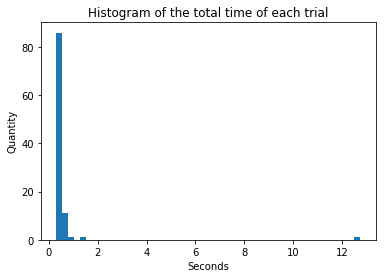

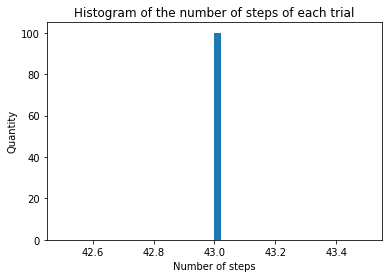

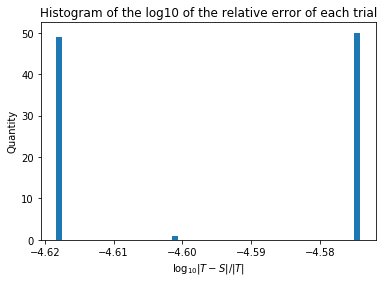

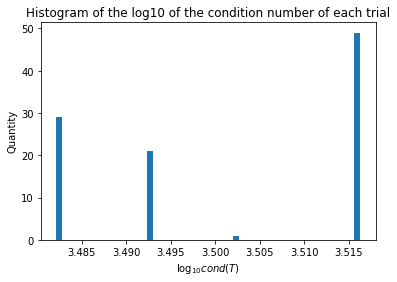

In [3]:
r = 2
times, steps, rel_errors, conds = tf.stats(T, r)

As you probably noted, this function takes a long time to finish, even in this simple case. This happens because the computation is a hard task and we are doing it $100$ times! Taking in account the curse of dimensionality, you can imagine how horribly long will be to run this function with a big tensor.

There are times when one really need to gather this data, even if this take days or weeks of computations. That is why this function exists. Use it on you own risk.

Leaving this aside, now we have enough information to understand better how the CPD behaves in general.

First, the computation of one CPD always take something close to $0$ seconds, with an outlier in $14$ seconds. The same goes for the number of steps (the number of iterations), which concentrates around $43$, as expected. Also very important is the error, and as we can see, the CPD's errors are concentrated around $-4.62$ and $-4.57$ (note that this is a $log_{10}$ scale). Finally, the condition numbers are close to $3.5$, which is a large number (something around $10^{3.5}$). Unfortunately this is unavoidable behavior of the CPD, since this problem is really hard.

Below we show the expected values (the means) associated with the histograms showed.

In [4]:
print('E[seconds] =', times.mean())
print()
print('E[number of steps] =', steps.mean())
print()
print('E[relative error] =', rel_errors.mean())
print()
print('E[condition number] =', conds.mean())

E[seconds] = 0.5743756222724915

E[number of steps] = 43.0

E[relative error] = 2.5380468301755892e-05

E[condition number] = 3172.492348834714


# Rank Estimation

We already have seen how to obtain a estimate for the rank with the function **infotens**. This function show not only the rank, but also a lot more information about $T$. If you just want the rank, use the function **rank**. AS already mentioned, this function can take a long time to finish, since it computes the CPD of $T$ for several possible ranks. 

One option of **rank** not accessible with **infotens** is the option 'display'. This option is 'full' by default, but **infotens** sets it to 'none', so we don't have too much information onthe screen. When this option is enabled the program shows a plot of the relative errors computed for each rank. There we can see if the estimate is reasonable. 

Start searching for rank
-------------------------------------------------------------------
Estimated rank(T) = 2
|T - T_approx|/|T| = 2.407710476601012e-05


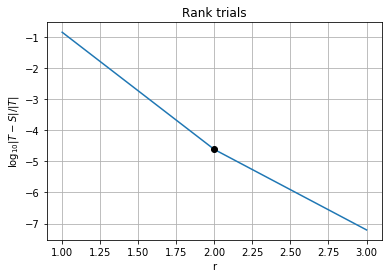

In [5]:
# Estimate rank of T.
r, error_per_rank = tf.rank(T)

As you can see, the error keeps decreasing when the rank is $3$. The program finished and considered it to be $2$ because the difference of these error were just too small. This criterion is not the best one and this function should be taken with a grain of salt.

As a matter of fact, we know the rank of $T$ must be between $1$ and $4$. Just out of curiosity, let's see what are the errors of the CPD of $T$ for $r = 1,2,3,4$.  

In [6]:
# Compute the CPD of T for r = 1,2,3,4.
for r in [1,2,3,4]:
    print('------------------------------------------------')
    print()
    print('CPD for r =',r)
    Lambda, X, Y, Z, T_approx, rel_err, step_sizes_trunc, step_sizes_ref, errors_trunc, errors_ref = tf.cpd(T, r)

    # Show the CPD computed. 
    print('Lambda =\n',Lambda)
    print()
    print('X =\n', X)
    print()
    print('Y =\n', Y)
    print()
    print('Z =\n', Z)
    print()

    # Show the coordinate representation of this CPD.
    print('T_approx =')
    tf.showtens(T_approx)

    # Show relative error of this approximation.
    print('|T - T_approx|/|T| =',rel_err)

------------------------------------------------

CPD for r = 1
Lambda =
 [-4.84927479]

X =
 [[-0.48963374]
 [-0.87192821]]

Y =
 [[-0.48963374]
 [-0.87192821]]

Z =
 [[-0.48963374]
 [-0.87192821]]

T_approx =
[[0.56923396 1.0136784 ]
 [1.0136784  1.80513458]]

[[1.0136784  1.80513458]
 [1.80513458 3.21454108]]

|T - T_approx|/|T| = 0.14208771656239352
------------------------------------------------

CPD for r = 2
Lambda =
 [-75.72858909  71.48594844]

X =
 [[-0.70037675 -0.71396738]
 [-0.71377336 -0.70017896]]

Y =
 [[-0.70037675 -0.71396738]
 [-0.71377336 -0.70017896]]

Z =
 [[-0.70037675 -0.71396738]
 [-0.71377336 -0.70017896]]

T_approx =
[[-4.61607859e-05  1.00004617e+00]
 [ 1.00004617e+00  1.99995379e+00]]

[[1.00004617 1.99995379]
 [1.99995379 3.00004617]]

|T - T_approx|/|T| = 2.6664226293840906e-05
------------------------------------------------

CPD for r = 3
Lambda =
 [-5.21594408  1.46219619  1.46219618]

X =
 [[-0.70644047 -0.70710791 -0.86976402]
 [-0.70777246 -0.70710

After seeing these results, what you think is the correct rank of $T$?